# Exercise 2

## 2.1 Given Fractal

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def L(x,y,a,b,c,d,e,f):
    x_new = a * x + b * y + e
    y_new = c * x + d * y + f
    return (x_new, y_new)

def L1(x,y):
    a = 0
    b = 0
    c = 0
    d = .16
    e = 0
    f = 0
    return L(x,y,a,b,c,d,e,f)

def L2(x,y):
    a = .2
    b = -0.26
    c = .23
    d = .22
    e = 0
    f = .2
    return L(x,y,a,b,c,d,e,f)

def L3(x,y):
    a = -.15
    b = .28
    c = .26
    d = .24
    e = 0
    f = .2
    return L(x,y,a,b,c,d,e,f)

def L4(x,y):
    a = .85
    b = .04
    c = -.04
    d = .85
    e = 0
    f = .2
    return L(x,y,a,b,c,d,e,f)

def step(x,y):
    random_number = np.random.rand()
    p1 = .01
    p2 = .07
    p3 = .07
    p4 = .85
    if (random_number < p1):
        return L1(x,y)
    if (random_number < p1 + p2):
        return L2(x,y)
    if (random_number < p1 + p2 + p3):
        return L3(x,y)
    return L4(x,y)

In [41]:
history = [(0,0)]

for _ in range(1000000):
    x, y = history[-1]
    x_new, y_new = step(x,y)
    history.append((x_new, y_new))

    
history = np.array(history)

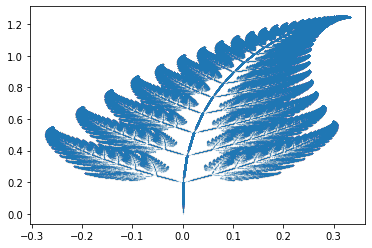

In [47]:
plt.scatter(history[:,0], history[:,1],s=.001)

## 2.3 Fractal dimension

In [48]:
def is_in_box(point,left,right,top,bottom):
    x,y = point
    if y < bottom or y > top:
        return False
    if x < left or x > right:
        return False
    return True

def any_is_in_box(data,left,right,top,bottom):
    for point in data:
        if(is_in_box(point, left,right,top,bottom))
            return True
    return False

def count_box(data, n_sqrt, height, width):
    height_box = height / n_sqrt
    width_box = width / n_sqrt
    left = 0
    right = width_box
    top = 0
    bottom = height_box
    
    for _ in range(n_sqrt**2):
        # iterate through all boxes

In [49]:
point = np.array((1,2))